In [556]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [557]:
df=pd.read_csv("crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# EDA

In [558]:
print(df.shape)
df.info()
df.describe()

(2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [559]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [560]:
print(df.duplicated().sum())
print(df.isnull().sum())

0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [561]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [562]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [563]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [564]:
# PIVOT TABLE
crop_summ=pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summ

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


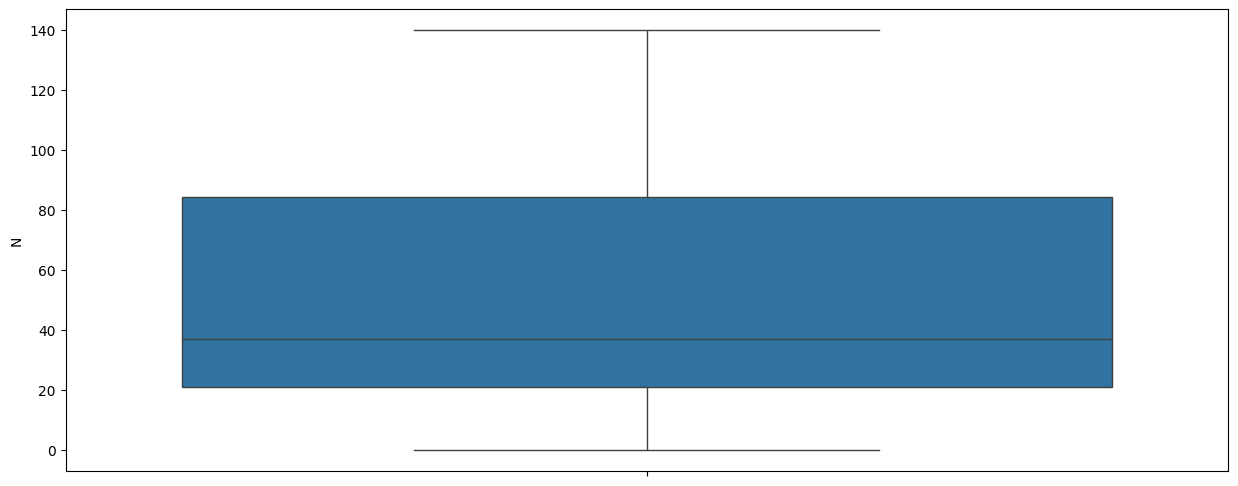

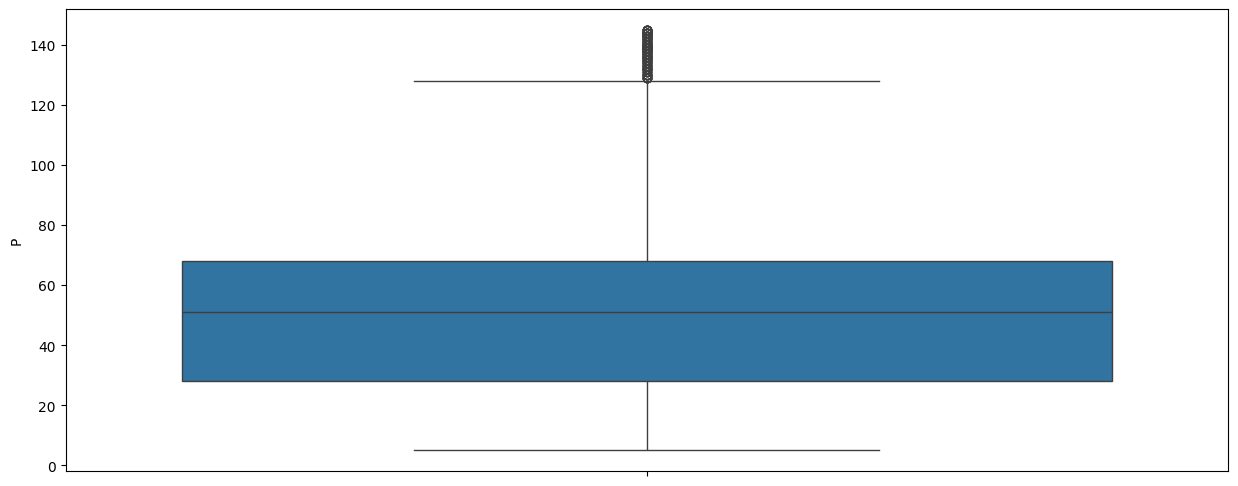

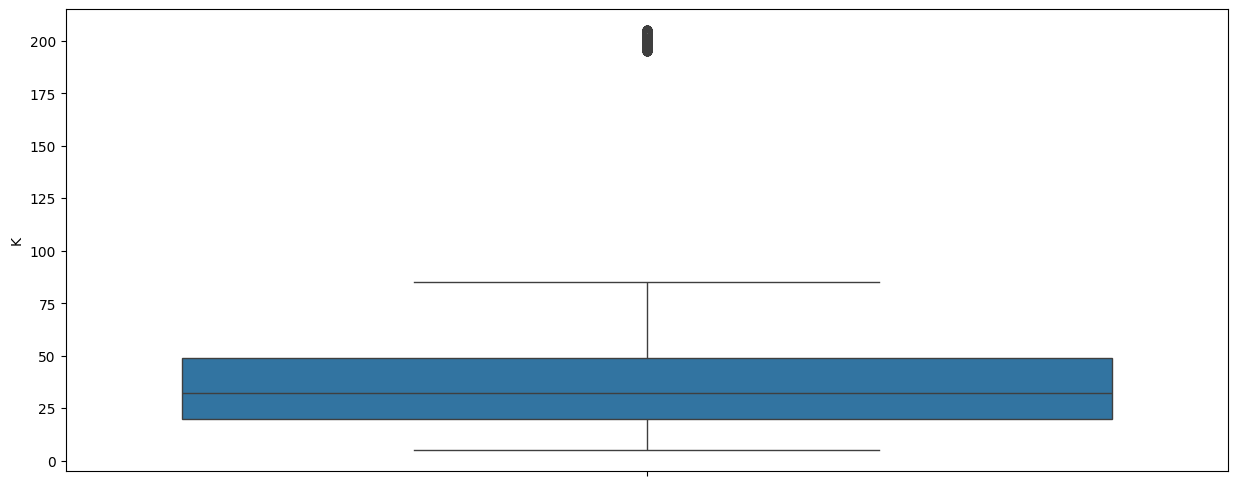

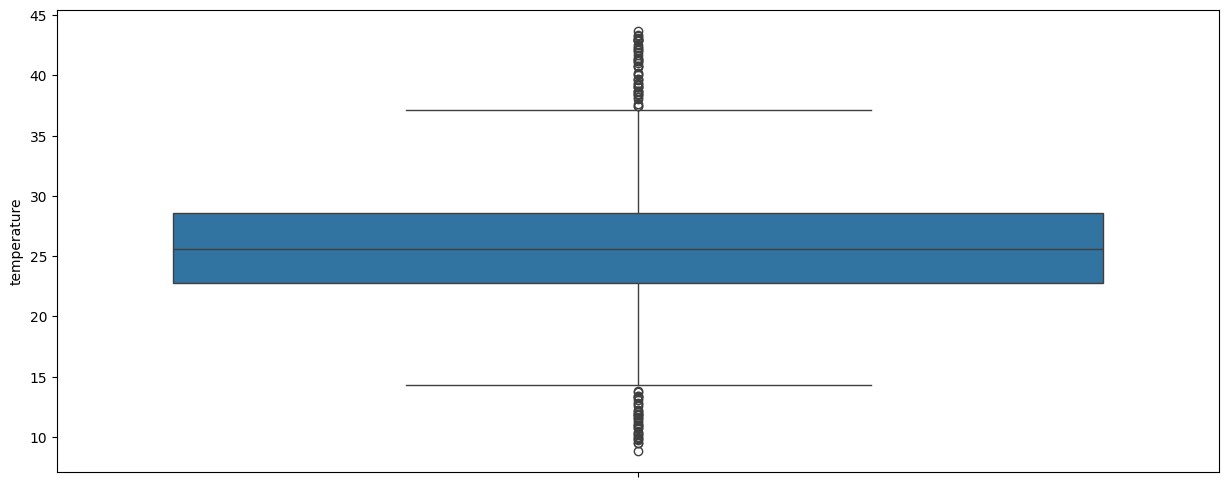

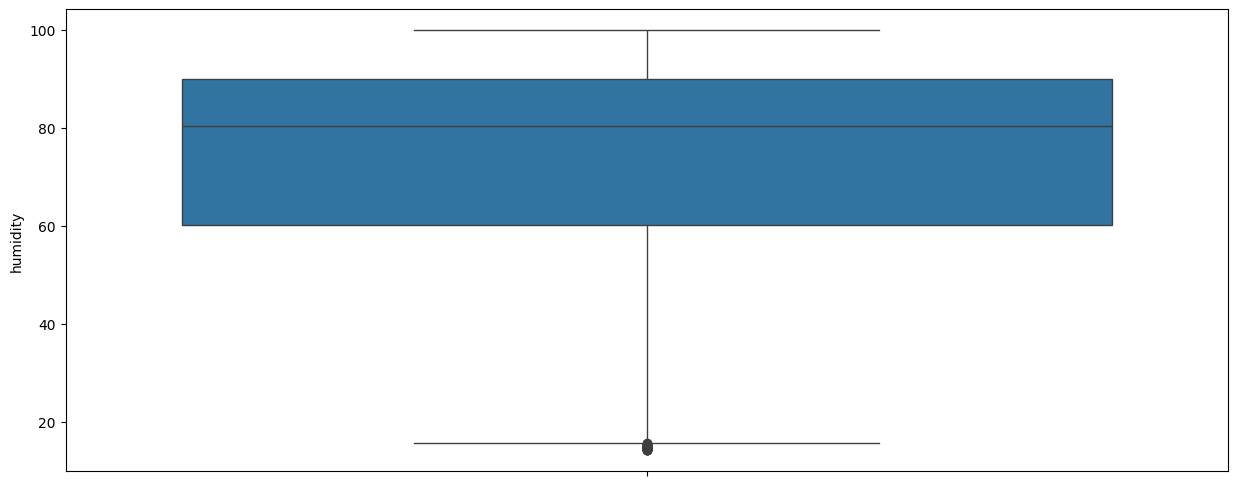

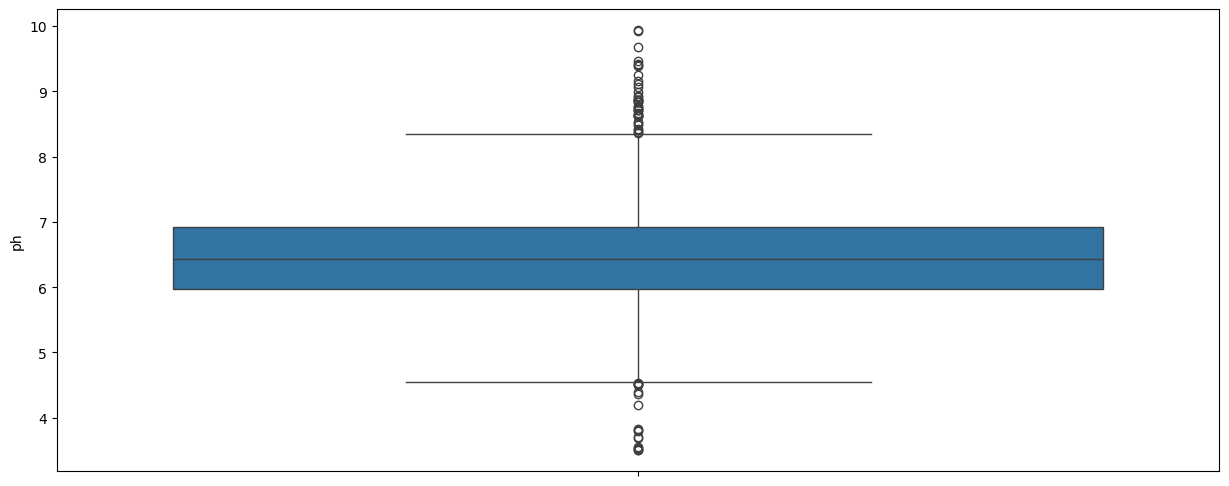

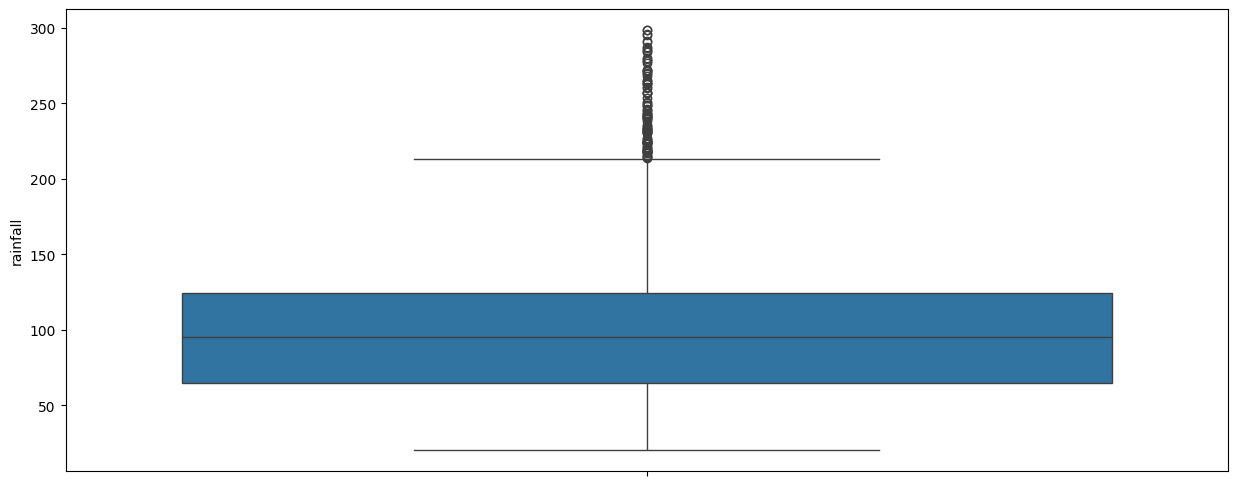

In [565]:
data1 = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
for i in data1.columns:
             plt.figure(figsize=(15,6))
             sns.boxplot(data1[i])
             plt.xticks(rotation = 90)
             plt.show()

In [566]:
crop_summ_new = crop_summ.reset_index()
crop_summ_new

,label,K,N,P,humidity,ph,rainfall,temperature
0,apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
1,banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
2,blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
3,chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
4,coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
5,coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
6,cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
7,grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
8,jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376
9,kidneybeans,20.05,20.75,67.54,21.605357,5.749411,105.919778,20.115085


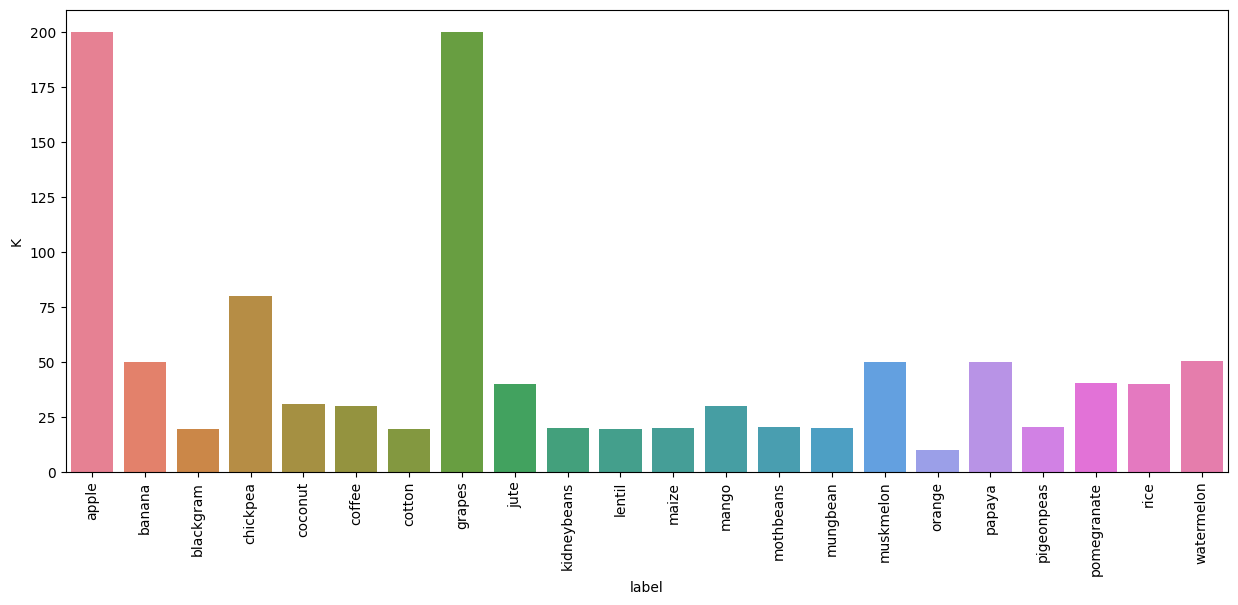

In [567]:
plt.figure(figsize=(15,6))
sns.barplot(x='label',y='K',data=crop_summ_new,hue="label")
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='label'>

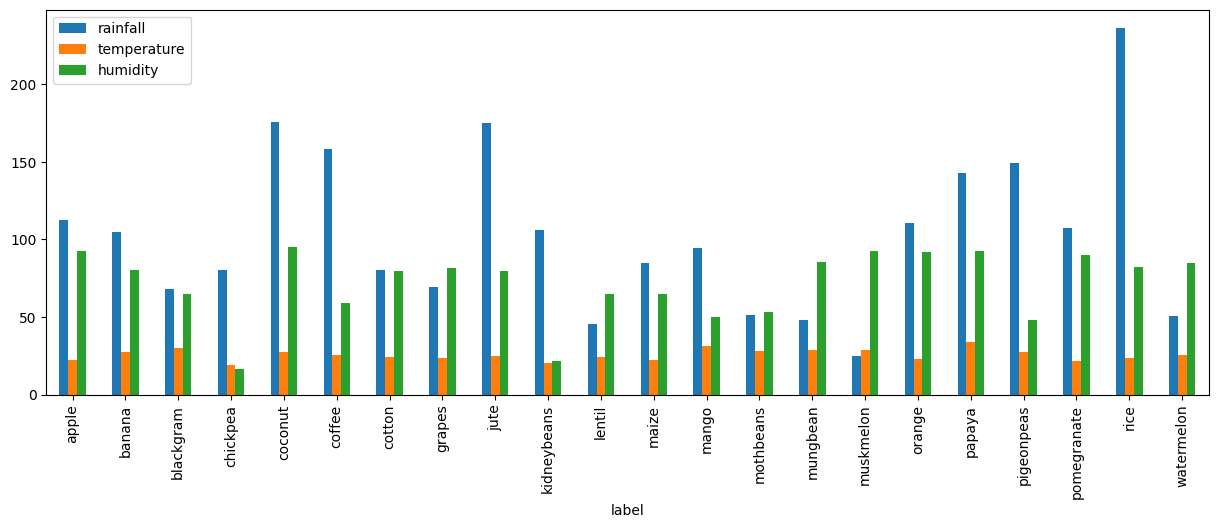

In [568]:

crop_summ[["rainfall", "temperature", "humidity"]].plot(
    kind="bar", figsize=(15,5)
)

In [569]:
corr=df.drop(columns=['label']).corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

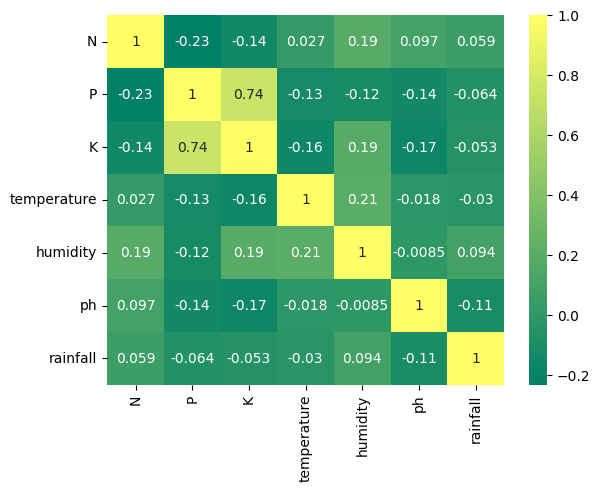

In [570]:
sns.heatmap(corr,annot=True,cmap='summer')

# Model Making

In [571]:
x=df.drop('label',axis=1)
y=df['label']

In [572]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [573]:
import lightgbm as lgb  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model=lgb.LGBMClassifier()
model1=LogisticRegression()
model2=DecisionTreeClassifier()
model3=RandomForestClassifier()

model.fit(x_train,y_train)
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.030418
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.042252
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] 

c:\Users\akash\OneDrive\Desktop\Crop Recommendatoin System\cropenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [574]:
y_pred=model.predict(x_test)
y_pred1=model1.predict(x_test)
y_pred2=model2.predict(x_test)
y_pred3=model3.predict(x_test)


In [575]:
from sklearn.metrics import accuracy_score
print('LightBGM:',accuracy_score(y_test,y_pred)*100)
print('LogisticRegression:',accuracy_score(y_test,y_pred1)*100)
print('decision tree:',accuracy_score(y_test,y_pred2)*100)
print('random forest:',accuracy_score(y_test,y_pred3)*100)

LightBGM: 99.31818181818181
LogisticRegression: 96.81818181818181
decision tree: 98.86363636363636
random forest: 99.77272727272727


In [579]:
x_test[0:1]

,N,P,K,temperature,humidity,ph,rainfall
1320,105,14,50,26.214884,87.688398,6.419052,59.655908


In [580]:
print(y_test.iloc[0:1])
print(model1.predict(x_test.iloc[0:1]))

1320    watermelon
Name: label, dtype: object
['watermelon']


In [577]:
# Since random forest is giving the best accuracy so our model will be model3

In [578]:
import pickle

# Save the trained pipeline using pickle
pickle_model_path = "model.pkl"
with open(pickle_model_path, "wb") as f:
    pickle.dump(model3,f)